Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [2]:
NAME = "Helen Ng"

# Assignment 2 - Time Series Analysis
**(30 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. You will use the Yahoo Finance library. To install it, you will need to run this code: pip install yfinance

2. *(4 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. 

3. *(6 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(6 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(8 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(6 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `yfinance`.

---------

### Import all the relevant libraries and follow the examples below for importing data.

In [7]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web


# Option 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)


AttributeError: module 'yfinance' has no attribute 'pdr_override'

In [ ]:
# Option 2) Using yfinance library only to download AMZN data

amzn = yf.download('AMZN', start=start)

In [ ]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB', 'IBM', 'MMM']
all_stocks = yf.download(all_stocks_list, start = start)

In [ ]:
# 1

!pip install yfinance pandas-datareader


import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web


import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot, scatter_matrix

print("Libraries installed and imported successfully!")


In [4]:
# 2 Adjusted close prices for FB, MMM, IBM, and AMZN the last 60 months

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock tickers
tickers = ['META', 'MMM', 'IBM', 'AMZN']

# Calculate the date range (last 60 months)
end_date = datetime.now()
start_date = end_date - timedelta(days=60*30)

# Download the data with auto_adjust=True
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# With auto_adjust=True, 'Close' is already the adjusted close
adj_close = data['Close']

print("Adjusted Close Prices:")
print(adj_close)

print("\nFirst 10 rows:")
print(adj_close.head(10))

print("\nLast 10 rows:")
print(adj_close.tail(10))

[*********************100%***********************]  4 of 4 completed

Adjusted Close Prices:
Ticker            AMZN         IBM        META         MMM
Date                                                      
2020-12-11  155.820999   96.592224  271.873932  121.537529
2020-12-14  157.848495   96.017036  272.510071  120.881050
2020-12-15  158.255997   97.882492  273.861694  121.998489
2020-12-16  162.048004   97.587135  273.981018  122.508347
2020-12-17  161.804001   97.587135  272.798279  123.374336
...                ...         ...         ...         ...
2025-11-10  248.399994  309.130005  631.760010  167.669998
2025-11-11  249.100006  313.720001  627.080017  168.669998
2025-11-12  244.199997  314.980011  609.010010  171.080002
2025-11-13  237.580002  304.859985  609.890015  170.619995
2025-11-14  234.690002  305.690002  609.460022  167.580002

[1238 rows x 4 columns]

First 10 rows:
Ticker            AMZN        IBM        META         MMM
Date                                                     
2020-12-11  155.820999  96.592224  271.873932  121.53

In [6]:
# 3 Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock tickers 
tickers = ['META', 'MMM', 'IBM', 'AMZN']

# Calculate the date range (last 60 months)
end_date = datetime.now()
start_date = end_date - timedelta(days=60*30)

# Downloading the data
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# Extract the adjusted close prices 
adj_close = data['Close']

# Resampling to end of business month
monthly_adj_close = adj_close.resample('BME').last()

print("Monthly Adjusted Close Prices (End of Business Month):")
print(monthly_adj_close)

print("\nFirst 10 months:")
print(monthly_adj_close.head(10))

print("\nLast 10 months:")
print(monthly_adj_close.tail(10))

print("\nShape:{monthly_adj_close.shape}")
print(f"Total months: {monthly_adj_close.shape[0]}")


[*********************100%***********************]  4 of 4 completed


Monthly Adjusted Close Prices (End of Business Month):
Ticker            AMZN         IBM        META         MMM
Date                                                      
2020-12-31  162.846497   97.843636  271.486359  122.075317
2021-01-29  160.309998   92.581474  256.747253  122.682953
2021-02-26  154.646500   93.676849  256.041534  123.271385
2021-03-31  154.703995  104.964058  292.725464  135.678818
2021-04-30  173.371002  111.753723  323.088287  138.819427
2021-05-31  161.153503  114.483788  326.715942  144.026108
2021-06-30  172.007996  116.753716  345.579590  140.897888
2021-07-30  166.379501  112.269615  354.116943  140.408417
2021-08-31  173.539505  113.062653  377.055603  139.193008
2021-09-30  164.251999  111.926720  337.310608  125.383766
2021-10-29  168.621506  100.784813  321.587524  127.713913
2021-11-30  175.353500   99.996147  322.472046  122.527458
2021-12-31  166.716995  114.137367  334.289246  127.996651
2022-01-31  149.573502  114.060524  311.340698  119.630707
2

[*********************100%***********************]  4 of 4 completed


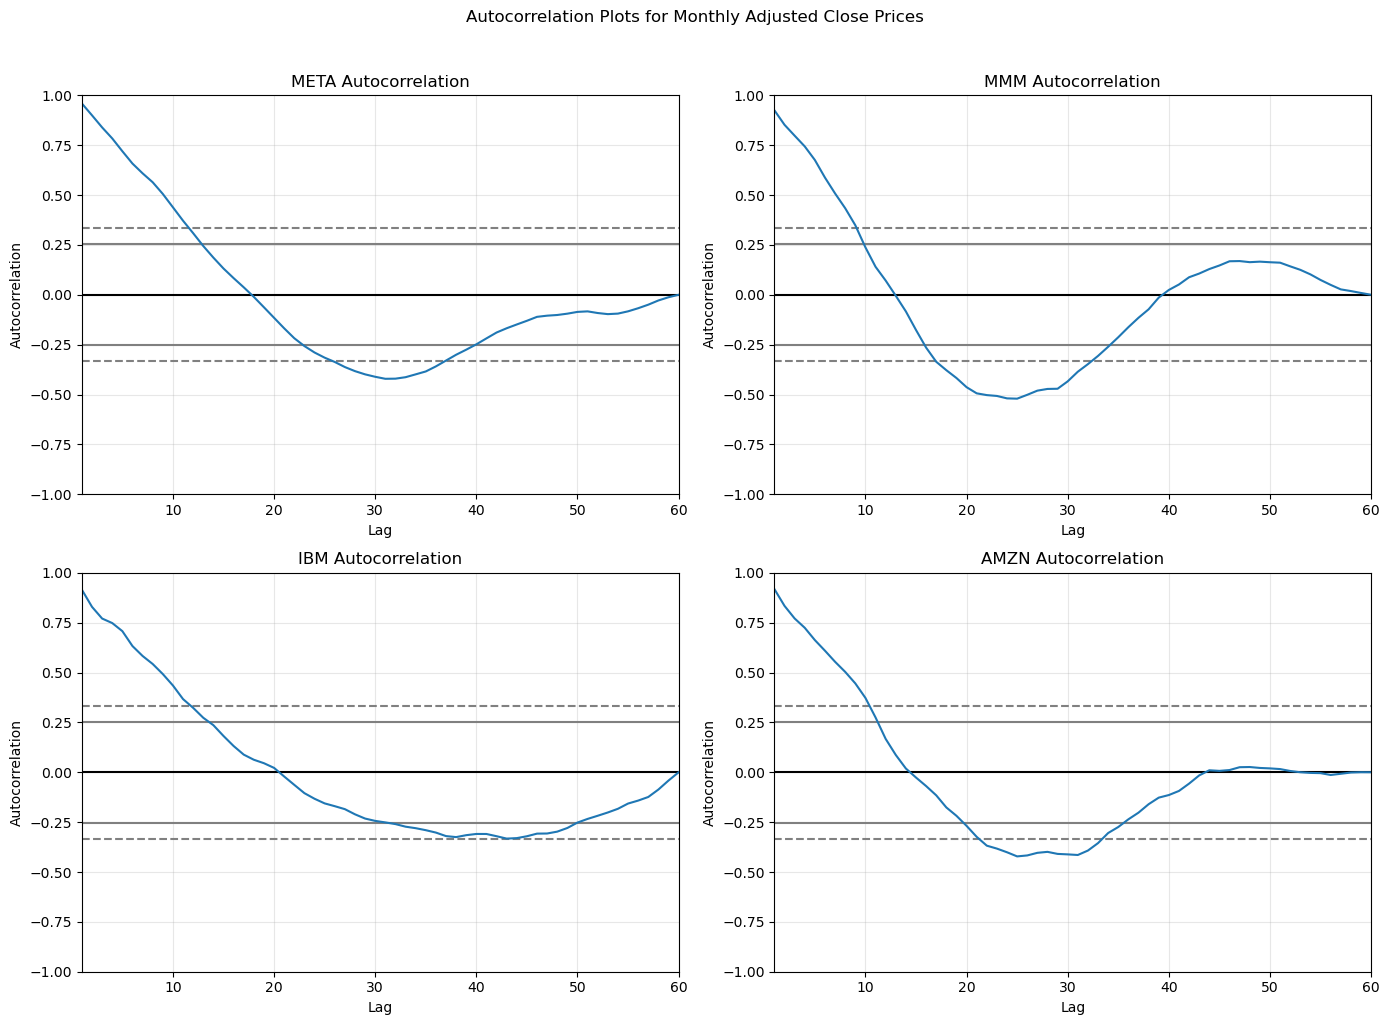

In [8]:
# 4 

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Define the stock tickers 
tickers = ['META', 'MMM', 'IBM', 'AMZN']

# Calculate the date range (last 60 months)
end_date = datetime.now()
start_date = end_date - timedelta(days=60*30)

# Downloading the data
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

#Extracting the adjusted close prices 
adj_close = data['Close']

# Resample to end of business month
monthly_adj_close = adj_close.resample('BME').last()

# Create autocorrelation plots for each stock 
fig, axes = plt.subplots(2,2, figsize=(14,10))
fig.suptitle('Autocorrelation Plots for Monthly Adjusted Close Prices', fontsize = 12, y=1.02)

# Flattening the axes for easier iteration
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    plt.sca(axes[i])
    autocorrelation_plot(monthly_adj_close[ticker])
    axes[i].set_title(f'{ticker} Autocorrelation')
    axes[i].set_xlabel('Lag')
    axes[i].set_ylabel('Autocorrelation')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Yes, the stock prices are highly autocorrelated which means that today's price is highly correlated with yesterday's price, and this month's price is highly correlated with last month's price, etc.
# Values above the blue dashed lines indicate statistically significant autocorrelation. The autocorrelation typically starts very high (near 1.0) at lag 0 and gradually decreases as the lag increases.
# If most values are above the significance lines, the series is autocorrelated. 
# This happens for 3 reasons: 
# 1) Prices tend to move in trends - if a stock goes up this month, it's more likely to go up next month
# 2) Random walk with drift - stock prices follow a random walk pattern where each price depends heavily on the previous price. 
# 3) Market efficiency - prices incorporate all available information grduaally and not instantaneously.

[*********************100%***********************]  4 of 4 completed


Monthly Returns (first 10 rows):
Ticker          AMZN       IBM      META       MMM
Date                                              
2020-12-31       NaN       NaN       NaN       NaN
2021-01-29 -0.015576 -0.053781 -0.054291  0.004977
2021-02-26 -0.035328  0.011831 -0.002748  0.004797
2021-03-31  0.000372  0.120491  0.143273  0.100651
2021-04-30  0.120663  0.064685  0.103725  0.023148
2021-05-31 -0.070470  0.024429  0.011228  0.037507
2021-06-30  0.067355  0.019827  0.057737 -0.021720
2021-07-30 -0.032722 -0.038406  0.024704 -0.003474
2021-08-31  0.043034  0.007064  0.064777 -0.008657
2021-09-30 -0.053518 -0.010047 -0.105409 -0.099209

Monthly Returns (last 10 rows):
Ticker          AMZN       IBM      META       MMM
Date                                              
2025-02-28 -0.106866 -0.006172 -0.030442  0.024213
2025-03-31 -0.103731 -0.014974 -0.136677 -0.053249
2025-04-30 -0.030695 -0.027507 -0.047470 -0.054133
2025-05-30  0.111647  0.078422  0.179399  0.073188
2025-06-30  0.07

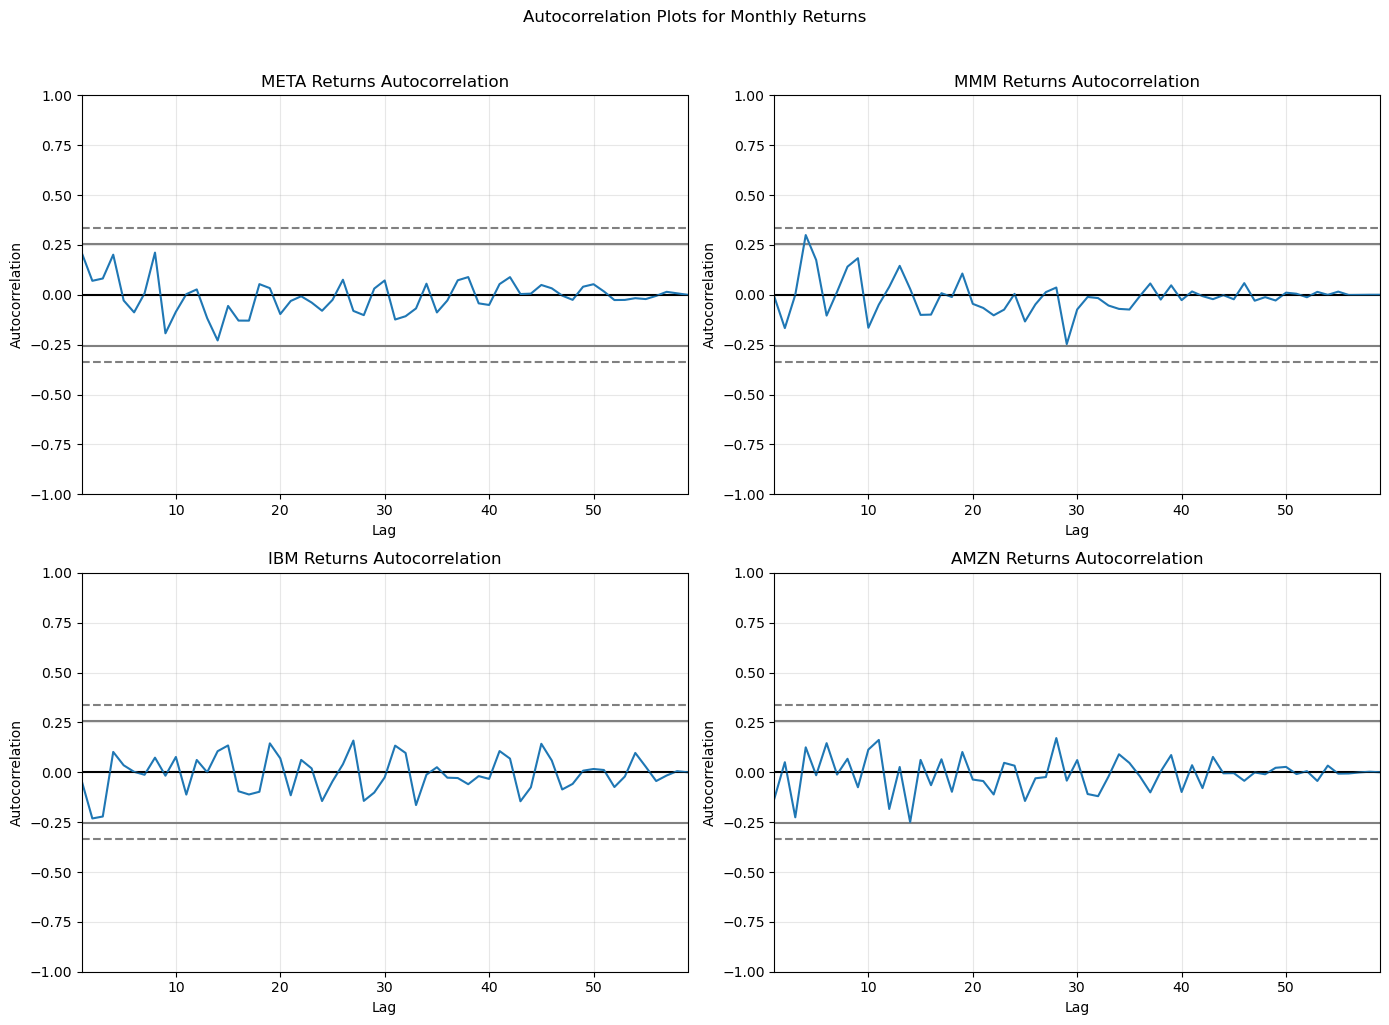


Returns Autocorrelation Analysis

META:
 Lag-1 Autocorrelation: 0.2099
  Mean Return: 0.0212 (2.12%)
 Std Dev: 0.1200

MMM:
 Lag-1 Autocorrelation: -0.0112
  Mean Return: 0.0084 (0.84%)
 Std Dev: 0.0796

IBM:
 Lag-1 Autocorrelation: -0.0473
  Mean Return: 0.0220 (2.20%)
 Std Dev: 0.0721

AMZN:
 Lag-1 Autocorrelation: -0.1317
  Mean Return: 0.0102 (1.02%)
 Std Dev: 0.0901


In [10]:
# 5

import yfinance as yf
import pandas as pd 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Defining the stock tickers
tickers = ['META', 'MMM', 'IBM', 'AMZN']

# Calculating the date range (last 60 months)
end_date = datetime.now()
start_date = end_date - timedelta(days=60*30)

# Downloading the data
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# Extracting the adjusted close prices 
adj_close = data['Close']

# Resample to end of business month 
monthly_adj_close = adj_close.resample('BME').last()

# Calculating monthly returns using the "shift trick"
# Return = (Price_t - Price_t-1)/Price_t-1
monthly_returns = (monthly_adj_close - monthly_adj_close.shift(1))/monthly_adj_close.shift(1)

print("Monthly Returns (first 10 rows):")
print(monthly_returns.head(10))

print("\nMonthly Returns (last 10 rows):")
print(monthly_returns.tail(10))

# Creating autocorrelation plots for monthly returns
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
fig.suptitle('Autocorrelation Plots for Monthly Returns', fontsize = 12, y=1.02)

# Flattening axes for easier iteration 
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    plt.sca(axes[i])
    autocorrelation_plot(monthly_returns[ticker].dropna())
    axes[i].set_title(f'{ticker} Returns Autocorrelation')
    axes[i].set_xlabel('Lag')
    axes[i].set_ylabel('Autocorrelation')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color = 'black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Returns Autocorrelation Analysis")
print("=" * 70)

for ticker in tickers: 
    lag1_corr = monthly_returns[ticker].dropna().autocorr(lag=1)
    print(f"\n{ticker}:")
    print(f" Lag-1 Autocorrelation: {lag1_corr:.4f}")
    print(f"  Mean Return: {monthly_returns[ticker].mean():.4f} ({monthly_returns[ticker].mean()*100:.2f}%)")
    print(f" Std Dev: {monthly_returns[ticker].std():.4f}")

# Monthly returns show little to no significant autocorrelation. 
# The plots should show that most autocorrelation should fall within the blue dashed confidence bands. Lag-1 autocorreltaion should be close (typically -0.1 and 0.1). There is no clear pattern or trend in the autocorrelation function.
# Returns are not autocorrelated (stationary, mean-reverting).
# Returns have low autocorrelation because: 
# 1) If returns were prdictable (autocorrelated), traders would explot this pattern, therefore eliminating it
# 2) Information incorporation - new information is quickly priced into the market, making future returns independent of past returns
# 3) Random Walk of Returns - monthly returns behave more like random noise around a mean

[*********************100%***********************]  4 of 4 completed


Combined Monthly Returns DataFrame:
Ticker          AMZN       IBM      META       MMM
Date                                              
2021-01-29 -0.015576 -0.053781 -0.054291  0.004977
2021-02-26 -0.035328  0.011831 -0.002748  0.004797
2021-03-31  0.000372  0.120491  0.143273  0.100651
2021-04-30  0.120663  0.064685  0.103724  0.023147
2021-05-31 -0.070470  0.024430  0.011228  0.037507
2021-06-30  0.067355  0.019827  0.057737 -0.021720
2021-07-30 -0.032722 -0.038406  0.024705 -0.003474
2021-08-31  0.043034  0.007064  0.064777 -0.008656
2021-09-30 -0.053518 -0.010047 -0.105409 -0.099209
2021-10-29  0.026602 -0.099546 -0.046613  0.018584

Shape: (59, 4)

Correlation Matrix
Ticker      AMZN       IBM      META       MMM
Ticker                                        
AMZN    1.000000  0.073642  0.453835  0.233921
IBM     0.073642  1.000000  0.235539  0.425520
META    0.453835  0.235539  1.000000  0.124852
MMM     0.233921  0.425520  0.124852  1.000000


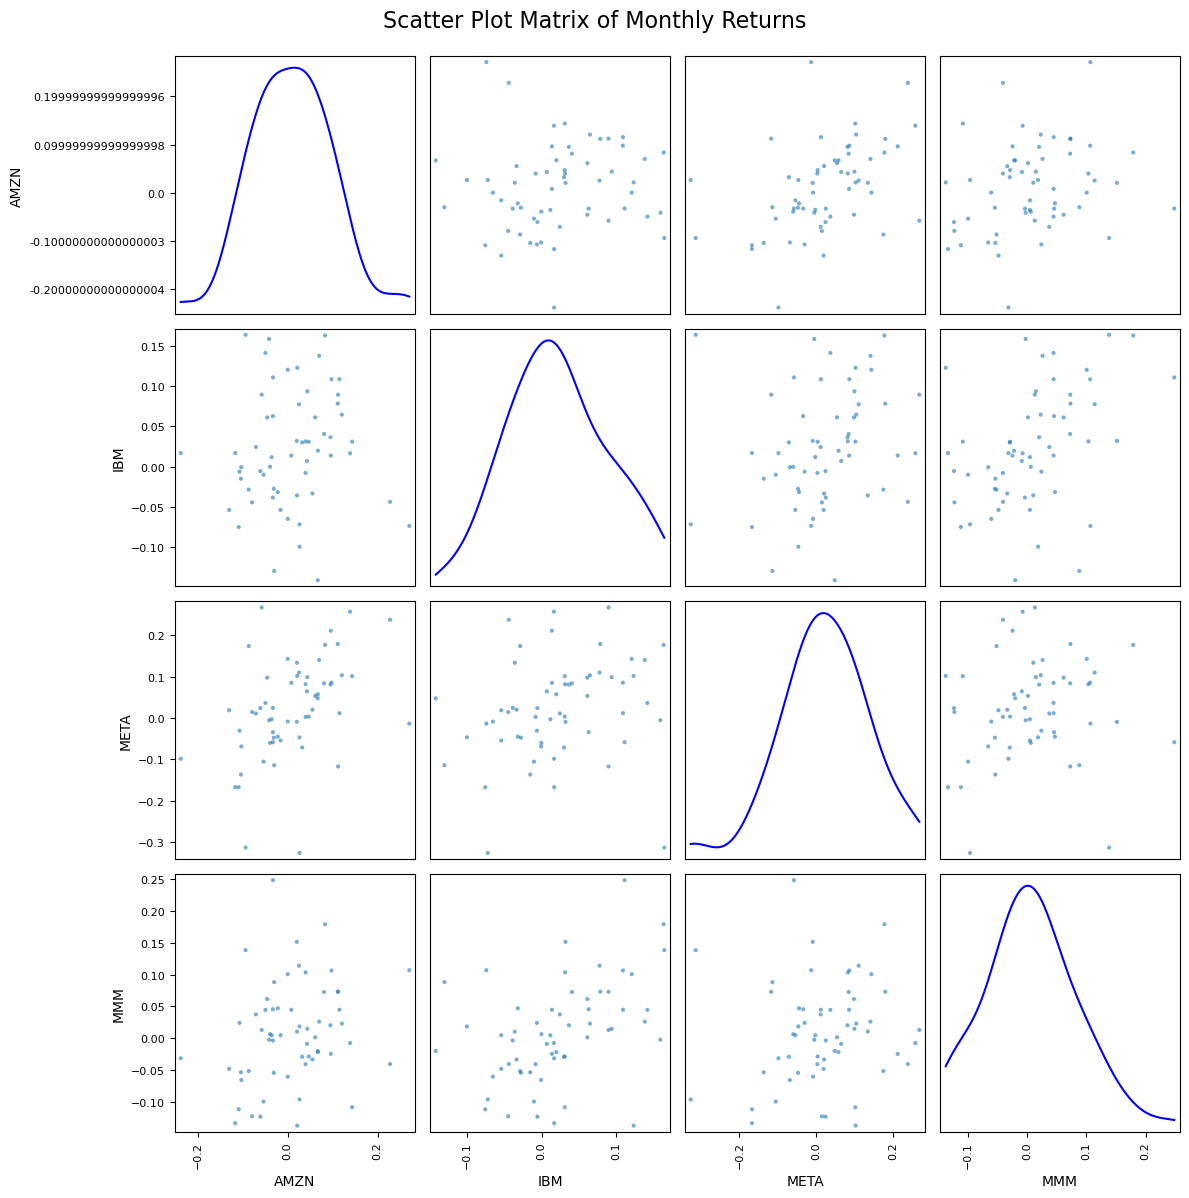


PAIRWISE CORRELATIONS
META vs MMM: 0.0736
META vs IBM: 0.4538
META vs AMZN: 0.2339
MMM vs IBM: 0.2355
MMM vs AMZN: 0.4255
IBM vs AMZN: 0.1249

SUMMARY STATISTICS
Ticker       AMZN        IBM       META        MMM
count   59.000000  59.000000  59.000000  59.000000
mean     0.010162   0.021999   0.021156   0.008431
std      0.090115   0.072074   0.120007   0.079601
min     -0.237525  -0.141224  -0.326342  -0.136937
25%     -0.047302  -0.030085  -0.047042  -0.040485
50%      0.020480   0.016844   0.018967   0.004977
75%      0.067225   0.071092   0.098508   0.046359
max      0.270596   0.163960   0.267711   0.248165


In [12]:
import yfinance as yf
import pandas as pd 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot, scatter_matrix

# Defining the stock tickers
tickers = ['META', 'MMM', 'IBM', 'AMZN']

# Calculating the date range (last 60 months)
end_date = datetime.now()
start_date = end_date - timedelta(days=60*30)

# Downloading the data
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# Extracting the adjusted close prices 
adj_close = data['Close']

# Resample to end of business month 
monthly_adj_close = adj_close.resample('BME').last()

# Calculating monthly returns using the "shift trick"
# Return = (Price_t - Price_t-1)/Price_t-1
monthly_returns = (monthly_adj_close - monthly_adj_close.shift(1))/monthly_adj_close.shift(1)

# Drop NaN values (first row will be NaN)
monthly_returns = monthly_returns.dropna()

print("Combined Monthly Returns DataFrame:")
print(monthly_returns.head(10))
print(f"\nShape: {monthly_returns.shape}")

# Calculate correlation matrix
print("\n" + "=" * 70)
print("Correlation Matrix")
print("=" * 70)
correlation_matrix = monthly_returns.corr()
print(correlation_matrix)

# Creating scatter plot matrix
fig = scatter_matrix(monthly_returns, figsize=(12, 12), alpha=0.6, 
                     diagonal='kde', density_kwds={'color': 'blue'})

# Adjusting layout
plt.suptitle('Scatter Plot Matrix of Monthly Returns', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# Print detailed correlation analysis
print("\n" + "=" * 70)
print("PAIRWISE CORRELATIONS")
print("=" * 70)

for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        corr = correlation_matrix.iloc[i, j]
        print(f"{tickers[i]} vs {tickers[j]}: {corr:.4f}")

# Summary statistics
print("\n" + "=" * 70)
print("SUMMARY STATISTICS")
print("=" * 70)
print(monthly_returns.describe())

# Yes, there is a positive correlation between stock returns, but it varies by pauir.
# Key Findings: 
# 1) Positive correlations are expected - all stock pairs typically show positive correlation which means when one stock goes up, other tend to go up (and vice versa)
# 2) Stock are correlated - all stocks are affected by overall market movements. Economic factors - interest rates, GDP growth, inflation affect all companies. Investor sentiment - market-wide optimism or pessimism impacts all stocks. Industry relationships - tech stocks may be more correlated with each other
# 3) META and AMZN: likely have higher correlation (both are tech/growth stocks); MMM vs IBM: moderate correlation (both are mature, established companuies), tech vs industrial (may show lower correlation due to different sectors)